<a href="https://colab.research.google.com/github/irfanzaka/KecerdasanBuatan/blob/main/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Download dataset
!wget --no-check-certificate \
    https://drive.google.com/file/d/1pmluzKrHV-8chtR1bt3J-TsYXTRasUxs/view?usp=sharing

--2021-11-16 16:43:56--  https://drive.google.com/file/d/1pmluzKrHV-8chtR1bt3J-TsYXTRasUxs/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.250.136.138, 142.250.136.113, 142.250.136.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.136.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing.7’

view?usp=sharing.7      [ <=>                ]  65.14K  --.-KB/s    in 0.002s  

2021-11-16 16:43:56 (40.3 MB/s) - ‘view?usp=sharing.7’ saved [66708]



In [55]:
import os
import zipfile

local_zip = '/tmp/seledri_and_pepaya_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [56]:
base_dir = '/tmp/seledri_and_pepaya_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_seledri_dir = os.path.join(train_dir, 'seledri')
train_pepaya_dir = os.path.join(train_dir, 'pepaya')

validation_seledri_dir = os.path.join(validation_dir, 'seledri')
validation_pepaya_dir = os.path.join(validation_dir, 'pepaya')

In [57]:
# Cek penamaan image yang ada di folder train_seledri_dir dan train_pepaya_dir
print(os.listdir(train_seledri_dir)[:10])
print(os.listdir(train_pepaya_dir)[:10])

['021.jpg', '011.jpg', '044.jpg', '046.jpg', '003.jpg', '023.jpg', '012.jpg', '014.jpg', '028.jpg', '039.jpg']
['021.jpg', '011.jpg', '044.jpg', '046.jpg', '003.jpg', '023.jpg', '012.jpg', '014.jpg', '028.jpg', '039.jpg']


In [58]:
# Cek jumlah data train dan data validation
print('total training cat images:', len(os.listdir(train_seledri_dir)))
print('total training dog images:', len(os.listdir(train_pepaya_dir)))
print('total validation cat images:', len(os.listdir(validation_seledri_dir)))
print('total validation dog images:', len(os.listdir(validation_pepaya_dir)))

total training cat images: 50
total training dog images: 50
total validation cat images: 50
total validation dog images: 50


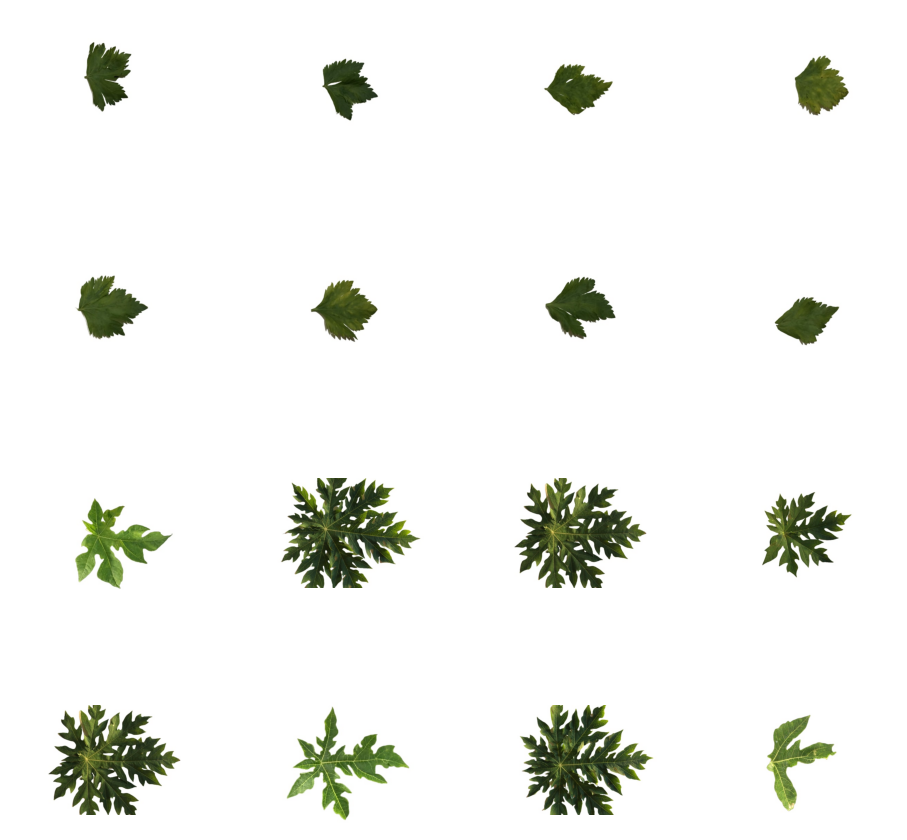

In [59]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_seledri_pix = [os.path.join(train_seledri_dir, fname) 
                for fname in os.listdir(train_seledri_dir)[pic_index-8:pic_index]]
next_pepaya_pix = [os.path.join(train_pepaya_dir, fname) 
                for fname in os.listdir(train_pepaya_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_seledri_pix+next_pepaya_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [60]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [61]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [62]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (100, 150, 150, 3)
Train Label =  (100,)
Validation Data =  (100, 150, 150, 3)
Validation Label =  (100,)


In [63]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [64]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[10:50])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[10:50])

Label sebelum di-encoder  ['pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya'
 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya'
 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya'
 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya'
 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya' 'pepaya']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


<h3>Definisikan Model</h3>

In [65]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [66]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [67]:
# Tampilkan model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8640128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [68]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [69]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
5/5 [==============================] - 1s 128ms/step - loss: 20.3776 - acc: 0.4700 - val_loss: 5.8416 - val_acc: 0.5000
Epoch 2/50
5/5 [==============================] - 0s 83ms/step - loss: 4.8814 - acc: 0.5800 - val_loss: 1.3443 - val_acc: 0.8600
Epoch 3/50
5/5 [==============================] - 0s 80ms/step - loss: 1.3053 - acc: 0.8700 - val_loss: 0.6934 - val_acc: 0.8700
Epoch 4/50
5/5 [==============================] - 0s 86ms/step - loss: 0.6441 - acc: 0.9200 - val_loss: 0.3980 - val_acc: 0.9300
Epoch 5/50
5/5 [==============================] - 0s 85ms/step - loss: 1.1170 - acc: 0.8800 - val_loss: 5.4790 - val_acc: 0.6900
Epoch 6/50
5/5 [==============================] - 0s 80ms/step - loss: 2.9631 - acc: 0.6700 - val_loss: 1.1815 - val_acc: 0.9200
Epoch 7/50
5/5 [==============================] - 0s 84ms/step - loss: 4.1534 - acc: 0.8100 - val_loss: 2.9893 - val_acc: 0.6500
Epoch 8/50
5/5 [==============================] - 0s 83ms/step - loss: 2.0737 - acc: 0.8100 - v

<h3>Evaluasi Model</h3>

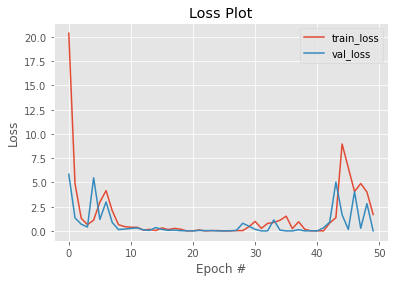

In [70]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

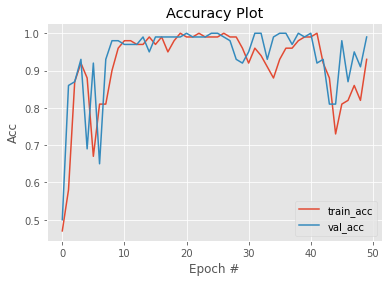

In [71]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

